In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_2c34df290e114128a9bd8545b3e7a825 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ihBhhPUJYErpAF2l66UeahHwtKji2O8L7k0tvRv09myD',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_2c34df290e114128a9bd8545b3e7a825.get_object(Bucket='fareproject-donotdelete-pr-xnqpddbgyxsa83',Key='fare_predict.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

fare_predict = pd.read_csv(body)
fare_predict.head()



,fare_amt,taxi_ptime,taxi_dtime,pass_count,trip_dist,rate_codeid,vendor_id,store_and_fwd_flag,pu_id,do_id,pay_type,extra,tax,tip,toll,improve_surcharge,total_amt
0,3000,14-01-2018 14:00,14-01-2018 18:00,3,200,rupees,1,n,1250,1350,online,0,14,10,60,8,3080
1,4500,15-01-2018 14:00,15-01-2018 2:00:00,2,300,rupees,2,y,1350,1450,offline,0,12,0,60,6,4580
2,5000,16-01-2018 14:00,16-01-2018 04:00,3,500,rupees,1,y,1032,1532,offline,200,12,5,120,8,5346
3,2000,17-01-2018 14:00,16-01-2018 03:00,4,150,rupees,2,n,1234,2341,online,0,14,10,0,6,2028
4,500,18-01-2018 14:00,16-01-2018 04:30,1,15,rupees,2,n,2314,7312,offline,0,12,15,0,0,527


In [2]:
import pandas
import numpy
import seaborn
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [3]:
#fare_predict = pandas.read_csv('C:/Users/CHANDU/Desktop/fare_predict.csv')

In [4]:
fare_predict.head()

,fare_amt,taxi_ptime,taxi_dtime,pass_count,trip_dist,rate_codeid,vendor_id,store_and_fwd_flag,pu_id,do_id,pay_type,extra,tax,tip,toll,improve_surcharge,total_amt
0,3000,14-01-2018 14:00,14-01-2018 18:00,3,200,rupees,1,n,1250,1350,online,0,14,10,60,8,3080
1,4500,15-01-2018 14:00,15-01-2018 2:00:00,2,300,rupees,2,y,1350,1450,offline,0,12,0,60,6,4580
2,5000,16-01-2018 14:00,16-01-2018 04:00,3,500,rupees,1,y,1032,1532,offline,200,12,5,120,8,5346
3,2000,17-01-2018 14:00,16-01-2018 03:00,4,150,rupees,2,n,1234,2341,online,0,14,10,0,6,2028
4,500,18-01-2018 14:00,16-01-2018 04:30,1,15,rupees,2,n,2314,7312,offline,0,12,15,0,0,527


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
fare_df = fare_predict[['fare_amt','taxi_ptime','taxi_dtime','pass_count','trip_dist','vendor_id','store_and_fwd_flag','pu_id','do_id','extra','tax','tip','toll','improve_surcharge','total_amt']]

In [7]:
fare_df

,fare_amt,taxi_ptime,taxi_dtime,pass_count,trip_dist,vendor_id,store_and_fwd_flag,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
0,3000,14-01-2018 14:00,14-01-2018 18:00,3,200,1,n,1250,1350,0,14,10,60,8,3080
1,4500,15-01-2018 14:00,15-01-2018 2:00:00,2,300,2,y,1350,1450,0,12,0,60,6,4580
2,5000,16-01-2018 14:00,16-01-2018 04:00,3,500,1,y,1032,1532,200,12,5,120,8,5346
3,2000,17-01-2018 14:00,16-01-2018 03:00,4,150,2,n,1234,2341,0,14,10,0,6,2028
4,500,18-01-2018 14:00,16-01-2018 04:30,1,15,2,n,2314,7312,0,12,15,0,0,527
5,100,19-01-2018 14:00,17-01-2018 13:15,1,3,1,n,1023,1022,0,14,0,0,0,114
6,2300,20-01-2018 14:00,20-01-2018 02:00,1,100,1,y,1234,11237,350,12,0,60,8,2730
7,4000,21-01-2018 14:00,21-01-2019 18:00,4,175,1,n,1034,1067,0,14,0,65,9,4088
8,7000,22-01-2018 14:00,24-07-2019,3,600,2,y,2090,3421,800,12,38,195,9,8054
9,3423,23-01-2018 14:00,21-01-2017 16:00,2,350,1,y,5654,5078,0,14,0,0,5,3442


In [8]:
fare_df.head()

,fare_amt,taxi_ptime,taxi_dtime,pass_count,trip_dist,vendor_id,store_and_fwd_flag,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
0,3000,14-01-2018 14:00,14-01-2018 18:00,3,200,1,n,1250,1350,0,14,10,60,8,3080
1,4500,15-01-2018 14:00,15-01-2018 2:00:00,2,300,2,y,1350,1450,0,12,0,60,6,4580
2,5000,16-01-2018 14:00,16-01-2018 04:00,3,500,1,y,1032,1532,200,12,5,120,8,5346
3,2000,17-01-2018 14:00,16-01-2018 03:00,4,150,2,n,1234,2341,0,14,10,0,6,2028
4,500,18-01-2018 14:00,16-01-2018 04:30,1,15,2,n,2314,7312,0,12,15,0,0,527


In [138]:
fare_df.isnull().any()

fare_amt              False
taxi_ptime            False
taxi_dtime            False
pass_count            False
trip_dist             False
vendor_id             False
store_and_fwd_flag    False
pu_id                 False
do_id                 False
extra                 False
tax                   False
tip                   False
toll                  False
improve_surcharge     False
total_amt             False
dtype: bool

In [139]:
fare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 15 columns):
fare_amt              15 non-null int64
taxi_ptime            15 non-null object
taxi_dtime            15 non-null object
pass_count            15 non-null int64
trip_dist             15 non-null int64
vendor_id             15 non-null int64
store_and_fwd_flag    15 non-null object
pu_id                 15 non-null int64
do_id                 15 non-null int64
extra                 15 non-null int64
tax                   15 non-null int64
tip                   15 non-null int64
toll                  15 non-null int64
improve_surcharge     15 non-null int64
total_amt             15 non-null int64
dtypes: int64(12), object(3)
memory usage: 1.8+ KB


In [9]:
fare_df_x = fare_df[['taxi_ptime','taxi_dtime','pass_count','trip_dist','vendor_id','store_and_fwd_flag','pu_id','do_id','extra','tax','tip','toll','improve_surcharge','total_amt']]
fare_df_y = fare_df[['fare_amt']]

In [10]:
fare_df_x.head()

,taxi_ptime,taxi_dtime,pass_count,trip_dist,vendor_id,store_and_fwd_flag,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
0,14-01-2018 14:00,14-01-2018 18:00,3,200,1,n,1250,1350,0,14,10,60,8,3080
1,15-01-2018 14:00,15-01-2018 2:00:00,2,300,2,y,1350,1450,0,12,0,60,6,4580
2,16-01-2018 14:00,16-01-2018 04:00,3,500,1,y,1032,1532,200,12,5,120,8,5346
3,17-01-2018 14:00,16-01-2018 03:00,4,150,2,n,1234,2341,0,14,10,0,6,2028
4,18-01-2018 14:00,16-01-2018 04:30,1,15,2,n,2314,7312,0,12,15,0,0,527


In [11]:
#fare_df_y.head()

In [12]:
x_train,x_test,y_train,y_test = train_test_split(fare_df_x,fare_df_y,test_size = 0.20)

In [13]:
x_train.head()

,taxi_ptime,taxi_dtime,pass_count,trip_dist,vendor_id,store_and_fwd_flag,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
2,16-01-2018 14:00,16-01-2018 04:00,3,500,1,y,1032,1532,200,12,5,120,8,5346
9,23-01-2018 14:00,21-01-2017 16:00,2,350,1,y,5654,5078,0,14,0,0,5,3442
5,19-01-2018 14:00,17-01-2018 13:15,1,3,1,n,1023,1022,0,14,0,0,0,114
13,27-01-2018 14:00,17-02-2000 05:00,2,130,3,n,4089,4344,0,0,0,0,0,1200
12,26-01-2018 14:00,16-02-2000 05:00,3,100,2,n,6464,53564,0,0,0,0,0,1034


In [14]:
x_train.describe()

,pass_count,trip_dist,vendor_id,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,2.833333,243.750000,2.000000,3559.416667,20133.750000,84.583333,7.500000,5.666667,34.583333,3.000000,2913.750000
std,1.267304,220.555961,0.738549,2298.655159,25516.821956,232.451934,6.667424,11.316387,62.720822,3.541956,2678.256391
min,1.000000,3.000000,1.000000,1023.000000,1022.000000,0.000000,0.000000,0.000000,0.000000,0.000000,114.000000
25%,2.000000,94.250000,1.750000,1321.000000,2138.750000,0.000000,0.000000,0.000000,0.000000,0.000000,938.000000
50%,3.000000,140.000000,2.000000,3201.500000,4711.000000,0.000000,12.000000,0.000000,0.000000,1.000000,1630.500000
75%,4.000000,387.500000,2.250000,5851.500000,43800.500000,3.750000,12.500000,6.250000,45.000000,6.000000,4771.500000
max,5.000000,600.000000,3.000000,6575.000000,66532.000000,800.000000,14.000000,38.000000,195.000000,9.000000,8054.000000


In [15]:
ptime_encoder = preprocessing.LabelEncoder()
ptime_encoder.fit(pandas.DataFrame(x_train['taxi_ptime']))

LabelEncoder()

In [16]:
x_train[['taxi_ptime']] = ptime_encoder.transform(pandas.DataFrame(x_train['taxi_ptime']))

In [17]:
x_train.head()

,taxi_ptime,taxi_dtime,pass_count,trip_dist,vendor_id,store_and_fwd_flag,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
2,1,16-01-2018 04:00,3,500,1,y,1032,1532,200,12,5,120,8,5346
9,6,21-01-2017 16:00,2,350,1,y,5654,5078,0,14,0,0,5,3442
5,4,17-01-2018 13:15,1,3,1,n,1023,1022,0,14,0,0,0,114
13,10,17-02-2000 05:00,2,130,3,n,4089,4344,0,0,0,0,0,1200
12,9,16-02-2000 05:00,3,100,2,n,6464,53564,0,0,0,0,0,1034


In [18]:
dtime_encoder = preprocessing.LabelEncoder()
dtime_encoder.fit(pandas.DataFrame(x_train['taxi_dtime']))

LabelEncoder()

In [19]:
x_train[['taxi_dtime']] = dtime_encoder.transform(pandas.DataFrame(x_train['taxi_dtime']))

In [20]:
x_train.head()

,taxi_ptime,taxi_dtime,pass_count,trip_dist,vendor_id,store_and_fwd_flag,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
2,1,4,3,500,1,y,1032,1532,200,12,5,120,8,5346
9,6,10,2,350,1,y,5654,5078,0,14,0,0,5,3442
5,4,7,1,3,1,n,1023,1022,0,14,0,0,0,114
13,10,8,2,130,3,n,4089,4344,0,0,0,0,0,1200
12,9,6,3,100,2,n,6464,53564,0,0,0,0,0,1034


In [21]:
ptime_scaler = StandardScaler()
ptime_scaler.fit(pandas.DataFrame(x_train['taxi_ptime']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
x_train[['taxi_ptime']] = ptime_scaler.transform(pandas.DataFrame(x_train['taxi_ptime']))

In [23]:
x_train.head()

,taxi_ptime,taxi_dtime,pass_count,trip_dist,vendor_id,store_and_fwd_flag,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
2,-1.303572,4,3,500,1,y,1032,1532,200,12,5,120,8,5346
9,0.144841,10,2,350,1,y,5654,5078,0,14,0,0,5,3442
5,-0.434524,7,1,3,1,n,1023,1022,0,14,0,0,0,114
13,1.303572,8,2,130,3,n,4089,4344,0,0,0,0,0,1200
12,1.013890,6,3,100,2,n,6464,53564,0,0,0,0,0,1034


In [24]:
dtime_scaler = StandardScaler()
dtime_scaler.fit(pandas.DataFrame(x_train['taxi_dtime']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
x_train[['taxi_dtime']] = dtime_scaler.transform(pandas.DataFrame(x_train['taxi_dtime']))

In [26]:
x_train.head()

,taxi_ptime,taxi_dtime,pass_count,trip_dist,vendor_id,store_and_fwd_flag,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
2,-1.303572,-0.434524,3,500,1,y,1032,1532,200,12,5,120,8,5346
9,0.144841,1.303572,2,350,1,y,5654,5078,0,14,0,0,5,3442
5,-0.434524,0.434524,1,3,1,n,1023,1022,0,14,0,0,0,114
13,1.303572,0.724207,2,130,3,n,4089,4344,0,0,0,0,0,1200
12,1.013890,0.144841,3,100,2,n,6464,53564,0,0,0,0,0,1034


In [27]:
pass_count_scaler = StandardScaler()
pass_count_scaler.fit(pandas.DataFrame(x_train['pass_count']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
x_train[['pass_count']] = pass_count_scaler.transform(pandas.DataFrame(x_train['pass_count']))

In [29]:
x_train.head()

,taxi_ptime,taxi_dtime,pass_count,trip_dist,vendor_id,store_and_fwd_flag,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
2,-1.303572,-0.434524,0.137361,500,1,y,1032,1532,200,12,5,120,8,5346
9,0.144841,1.303572,-0.686803,350,1,y,5654,5078,0,14,0,0,5,3442
5,-0.434524,0.434524,-1.510966,3,1,n,1023,1022,0,14,0,0,0,114
13,1.303572,0.724207,-0.686803,130,3,n,4089,4344,0,0,0,0,0,1200
12,1.013890,0.144841,0.137361,100,2,n,6464,53564,0,0,0,0,0,1034


In [30]:
trip_scaler = StandardScaler()
trip_scaler.fit(pandas.DataFrame(x_train['trip_dist']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
x_train[['trip_dist']] = trip_scaler.transform(pandas.DataFrame(x_train['trip_dist']))

In [32]:
x_train.head()

,taxi_ptime,taxi_dtime,pass_count,trip_dist,vendor_id,store_and_fwd_flag,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
2,-1.303572,-0.434524,0.137361,1.213499,1,y,1032,1532,200,12,5,120,8,5346
9,0.144841,1.303572,-0.686803,0.503158,1,y,5654,5078,0,14,0,0,5,3442
5,-0.434524,0.434524,-1.510966,-1.140097,1,n,1023,1022,0,14,0,0,0,114
13,1.303572,0.724207,-0.686803,-0.538675,3,n,4089,4344,0,0,0,0,0,1200
12,1.013890,0.144841,0.137361,-0.680743,2,n,6464,53564,0,0,0,0,0,1034


In [33]:
#rate_encoder = preprocessing.LabelEncoder()

#rate_encoder.fit(pandas.DataFrame(x_train['rate_codeid']))

In [34]:
#x_train[['rate_codeid']] = rate_encoder.transform(pandas.DataFrame(x_train['rate_codeid']))

In [35]:
x_train.head()

,taxi_ptime,taxi_dtime,pass_count,trip_dist,vendor_id,store_and_fwd_flag,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
2,-1.303572,-0.434524,0.137361,1.213499,1,y,1032,1532,200,12,5,120,8,5346
9,0.144841,1.303572,-0.686803,0.503158,1,y,5654,5078,0,14,0,0,5,3442
5,-0.434524,0.434524,-1.510966,-1.140097,1,n,1023,1022,0,14,0,0,0,114
13,1.303572,0.724207,-0.686803,-0.538675,3,n,4089,4344,0,0,0,0,0,1200
12,1.013890,0.144841,0.137361,-0.680743,2,n,6464,53564,0,0,0,0,0,1034


In [36]:
vendor_scaler = StandardScaler()
vendor_scaler.fit(pandas.DataFrame(x_train['vendor_id']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [37]:
x_train[['vendor_id']] = vendor_scaler.transform(pandas.DataFrame(x_train['vendor_id']))

In [38]:
x_train.head()

,taxi_ptime,taxi_dtime,pass_count,trip_dist,vendor_id,store_and_fwd_flag,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
2,-1.303572,-0.434524,0.137361,1.213499,-1.414214,y,1032,1532,200,12,5,120,8,5346
9,0.144841,1.303572,-0.686803,0.503158,-1.414214,y,5654,5078,0,14,0,0,5,3442
5,-0.434524,0.434524,-1.510966,-1.140097,-1.414214,n,1023,1022,0,14,0,0,0,114
13,1.303572,0.724207,-0.686803,-0.538675,1.414214,n,4089,4344,0,0,0,0,0,1200
12,1.013890,0.144841,0.137361,-0.680743,0.000000,n,6464,53564,0,0,0,0,0,1034


In [39]:
x_train['store_and_fwd_flag'] = x_train['store_and_fwd_flag'].map({'n':0,'y':1})

In [40]:
x_train.head()

,taxi_ptime,taxi_dtime,pass_count,trip_dist,vendor_id,store_and_fwd_flag,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
2,-1.303572,-0.434524,0.137361,1.213499,-1.414214,1,1032,1532,200,12,5,120,8,5346
9,0.144841,1.303572,-0.686803,0.503158,-1.414214,1,5654,5078,0,14,0,0,5,3442
5,-0.434524,0.434524,-1.510966,-1.140097,-1.414214,0,1023,1022,0,14,0,0,0,114
13,1.303572,0.724207,-0.686803,-0.538675,1.414214,0,4089,4344,0,0,0,0,0,1200
12,1.013890,0.144841,0.137361,-0.680743,0.000000,0,6464,53564,0,0,0,0,0,1034


In [41]:
pu_id_scaler = StandardScaler()
pu_id_scaler.fit(pandas.DataFrame(x_train['pu_id']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
x_train[['pu_id']] = pu_id_scaler.transform(pandas.DataFrame(x_train['pu_id']))

In [43]:
x_train.head()

,taxi_ptime,taxi_dtime,pass_count,trip_dist,vendor_id,store_and_fwd_flag,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
2,-1.303572,-0.434524,0.137361,1.213499,-1.414214,1,-1.148411,1532,200,12,5,120,8,5346
9,0.144841,1.303572,-0.686803,0.503158,-1.414214,1,0.951740,5078,0,14,0,0,5,3442
5,-0.434524,0.434524,-1.510966,-1.140097,-1.414214,0,-1.152500,1022,0,14,0,0,0,114
13,1.303572,0.724207,-0.686803,-0.538675,1.414214,0,0.240633,4344,0,0,0,0,0,1200
12,1.013890,0.144841,0.137361,-0.680743,0.000000,0,1.319788,53564,0,0,0,0,0,1034


In [44]:
x_train.tail()

,taxi_ptime,taxi_dtime,pass_count,trip_dist,vendor_id,store_and_fwd_flag,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
4,-0.724207,-0.144841,-1.510966,-1.083270,0.000000,0,-0.565894,7312,0,12,15,0,0,527
14,1.593255,1.013890,0.961524,-0.789662,0.000000,0,1.310701,66532,0,0,0,0,0,650
3,-1.013890,-0.724207,0.961524,-0.443963,0.000000,0,-1.056626,2341,0,14,10,0,6,2028
1,-1.593255,-1.593255,-0.686803,0.266378,0.000000,1,-1.003918,1450,0,12,0,60,6,4580
10,0.434524,-1.303572,0.961524,1.687059,1.414214,0,0.401938,40546,15,0,0,40,2,6757


In [45]:
do_id_scaler = StandardScaler()
do_id_scaler.fit(pandas.DataFrame(x_train['do_id']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [46]:
x_train['do_id'] = do_id_scaler.transform(pandas.DataFrame(x_train['do_id']))

In [47]:
x_train.head()

,taxi_ptime,taxi_dtime,pass_count,trip_dist,vendor_id,store_and_fwd_flag,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
2,-1.303572,-0.434524,0.137361,1.213499,-1.414214,1,-1.148411,-0.761415,200,12,5,120,8,5346
9,0.144841,1.303572,-0.686803,0.503158,-1.414214,1,0.951740,-0.616269,0,14,0,0,5,3442
5,-0.434524,0.434524,-1.510966,-1.140097,-1.414214,0,-1.152500,-0.782291,0,14,0,0,0,114
13,1.303572,0.724207,-0.686803,-0.538675,1.414214,0,0.240633,-0.646313,0,0,0,0,0,1200
12,1.013890,0.144841,0.137361,-0.680743,0.000000,0,1.319788,1.368382,0,0,0,0,0,1034


In [48]:
#x_train['pay_type'] = x_train['pay_type'].map({'offline':0,'online':1})


In [49]:
x_train.head()

,taxi_ptime,taxi_dtime,pass_count,trip_dist,vendor_id,store_and_fwd_flag,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
2,-1.303572,-0.434524,0.137361,1.213499,-1.414214,1,-1.148411,-0.761415,200,12,5,120,8,5346
9,0.144841,1.303572,-0.686803,0.503158,-1.414214,1,0.951740,-0.616269,0,14,0,0,5,3442
5,-0.434524,0.434524,-1.510966,-1.140097,-1.414214,0,-1.152500,-0.782291,0,14,0,0,0,114
13,1.303572,0.724207,-0.686803,-0.538675,1.414214,0,0.240633,-0.646313,0,0,0,0,0,1200
12,1.013890,0.144841,0.137361,-0.680743,0.000000,0,1.319788,1.368382,0,0,0,0,0,1034


In [50]:
extra_scaler = StandardScaler()
extra_scaler.fit(pandas.DataFrame(x_train['extra']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [51]:
x_train[['extra']] = extra_scaler.transform(pandas.DataFrame(x_train['extra']))

In [52]:
x_train.head()

,taxi_ptime,taxi_dtime,pass_count,trip_dist,vendor_id,store_and_fwd_flag,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
2,-1.303572,-0.434524,0.137361,1.213499,-1.414214,1,-1.148411,-0.761415,0.518597,12,5,120,8,5346
9,0.144841,1.303572,-0.686803,0.503158,-1.414214,1,0.951740,-0.616269,-0.380055,14,0,0,5,3442
5,-0.434524,0.434524,-1.510966,-1.140097,-1.414214,0,-1.152500,-0.782291,-0.380055,14,0,0,0,114
13,1.303572,0.724207,-0.686803,-0.538675,1.414214,0,0.240633,-0.646313,-0.380055,0,0,0,0,1200
12,1.013890,0.144841,0.137361,-0.680743,0.000000,0,1.319788,1.368382,-0.380055,0,0,0,0,1034


In [53]:
tax_scaler = StandardScaler()
tax_scaler.fit(pandas.DataFrame(x_train['tax']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [54]:
x_train[['tax']] = tax_scaler.transform(pandas.DataFrame(x_train['tax']))

In [55]:
x_train.head()

,taxi_ptime,taxi_dtime,pass_count,trip_dist,vendor_id,store_and_fwd_flag,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
2,-1.303572,-0.434524,0.137361,1.213499,-1.414214,1,-1.148411,-0.761415,0.518597,0.704934,5,120,8,5346
9,0.144841,1.303572,-0.686803,0.503158,-1.414214,1,0.951740,-0.616269,-0.380055,1.018239,0,0,5,3442
5,-0.434524,0.434524,-1.510966,-1.140097,-1.414214,0,-1.152500,-0.782291,-0.380055,1.018239,0,0,0,114
13,1.303572,0.724207,-0.686803,-0.538675,1.414214,0,0.240633,-0.646313,-0.380055,-1.174891,0,0,0,1200
12,1.013890,0.144841,0.137361,-0.680743,0.000000,0,1.319788,1.368382,-0.380055,-1.174891,0,0,0,1034


In [56]:
tip_scaler = StandardScaler()
tip_scaler.fit(pandas.DataFrame(x_train['tip']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [57]:
x_train[['tip']] = tip_scaler.transform(pandas.DataFrame(x_train['tip']))

In [58]:
x_train.head()

,taxi_ptime,taxi_dtime,pass_count,trip_dist,vendor_id,store_and_fwd_flag,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
2,-1.303572,-0.434524,0.137361,1.213499,-1.414214,1,-1.148411,-0.761415,0.518597,0.704934,-0.061531,120,8,5346
9,0.144841,1.303572,-0.686803,0.503158,-1.414214,1,0.951740,-0.616269,-0.380055,1.018239,-0.523015,0,5,3442
5,-0.434524,0.434524,-1.510966,-1.140097,-1.414214,0,-1.152500,-0.782291,-0.380055,1.018239,-0.523015,0,0,114
13,1.303572,0.724207,-0.686803,-0.538675,1.414214,0,0.240633,-0.646313,-0.380055,-1.174891,-0.523015,0,0,1200
12,1.013890,0.144841,0.137361,-0.680743,0.000000,0,1.319788,1.368382,-0.380055,-1.174891,-0.523015,0,0,1034


In [59]:
toll_scaler = StandardScaler()
toll_scaler.fit(pandas.DataFrame(x_train['toll']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [60]:
x_train[['toll']] = toll_scaler.transform(pandas.DataFrame(x_train['toll'])) 

In [61]:
x_train.head()

,taxi_ptime,taxi_dtime,pass_count,trip_dist,vendor_id,store_and_fwd_flag,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
2,-1.303572,-0.434524,0.137361,1.213499,-1.414214,1,-1.148411,-0.761415,0.518597,0.704934,-0.061531,1.422411,8,5346
9,0.144841,1.303572,-0.686803,0.503158,-1.414214,1,0.951740,-0.616269,-0.380055,1.018239,-0.523015,-0.575903,5,3442
5,-0.434524,0.434524,-1.510966,-1.140097,-1.414214,0,-1.152500,-0.782291,-0.380055,1.018239,-0.523015,-0.575903,0,114
13,1.303572,0.724207,-0.686803,-0.538675,1.414214,0,0.240633,-0.646313,-0.380055,-1.174891,-0.523015,-0.575903,0,1200
12,1.013890,0.144841,0.137361,-0.680743,0.000000,0,1.319788,1.368382,-0.380055,-1.174891,-0.523015,-0.575903,0,1034


In [62]:
surcharge_scaler = StandardScaler()
surcharge_scaler.fit(pandas.DataFrame(x_train['improve_surcharge']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [63]:
x_train[['improve_surcharge']] = surcharge_scaler.transform(pandas.DataFrame(x_train['improve_surcharge'])) 

In [64]:
x_train

,taxi_ptime,taxi_dtime,pass_count,trip_dist,vendor_id,store_and_fwd_flag,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
2,-1.303572,-0.434524,0.137361,1.213499,-1.414214,1,-1.148411,-0.761415,0.518597,0.704934,-0.061531,1.422411,1.474420,5346
9,0.144841,1.303572,-0.686803,0.503158,-1.414214,1,0.951740,-0.616269,-0.380055,1.018239,-0.523015,-0.575903,0.589768,3442
5,-0.434524,0.434524,-1.510966,-1.140097,-1.414214,0,-1.152500,-0.782291,-0.380055,1.018239,-0.523015,-0.575903,-0.884652,114
13,1.303572,0.724207,-0.686803,-0.538675,1.414214,0,0.240633,-0.646313,-0.380055,-1.174891,-0.523015,-0.575903,-0.884652,1200
12,1.013890,0.144841,0.137361,-0.680743,0.000000,0,1.319788,1.368382,-0.380055,-1.174891,-0.523015,-0.575903,-0.884652,1034
11,0.724207,-1.013890,1.785687,-0.680743,1.414214,0,1.370225,1.405180,-0.380055,-1.174891,-0.523015,-0.575903,-0.884652,1233
8,-0.144841,1.593255,0.137361,1.687059,0.000000,1,-0.667675,-0.684094,3.214550,0.704934,2.984262,2.671358,1.769303,8054
4,-0.724207,-0.144841,-1.510966,-1.083270,0.000000,0,-0.565894,-0.524826,-0.380055,0.704934,0.861437,-0.575903,-0.884652,527
14,1.593255,1.013890,0.961524,-0.789662,0.000000,0,1.310701,1.899194,-0.380055,-1.174891,-0.523015,-0.575903,-0.884652,650
3,-1.013890,-0.724207,0.961524,-0.443963,0.000000,0,-1.056626,-0.728301,-0.380055,1.018239,0.399953,-0.575903,0.884652,2028


In [65]:
total_fare_scaler = StandardScaler()
total_fare_scaler.fit(pandas.DataFrame(x_train['total_amt']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [66]:
x_train[['total_amt']] = total_fare_scaler.transform(pandas.DataFrame(x_train['total_amt'])) 

In [67]:
x_train.head()

,taxi_ptime,taxi_dtime,pass_count,trip_dist,vendor_id,store_and_fwd_flag,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
2,-1.303572,-0.434524,0.137361,1.213499,-1.414214,1,-1.148411,-0.761415,0.518597,0.704934,-0.061531,1.422411,1.474420,0.948528
9,0.144841,1.303572,-0.686803,0.503158,-1.414214,1,0.951740,-0.616269,-0.380055,1.018239,-0.523015,-0.575903,0.589768,0.206007
5,-0.434524,0.434524,-1.510966,-1.140097,-1.414214,0,-1.152500,-0.782291,-0.380055,1.018239,-0.523015,-0.575903,-0.884652,-1.091846
13,1.303572,0.724207,-0.686803,-0.538675,1.414214,0,0.240633,-0.646313,-0.380055,-1.174891,-0.523015,-0.575903,-0.884652,-0.668328
12,1.013890,0.144841,0.137361,-0.680743,0.000000,0,1.319788,1.368382,-0.380055,-1.174891,-0.523015,-0.575903,-0.884652,-0.733065


In [68]:
x_train_original = x_train
x_train = x_train.values
y_train = y_train.values

In [69]:
x_train_original = x_train

In [70]:
x_test

,taxi_ptime,taxi_dtime,pass_count,trip_dist,vendor_id,store_and_fwd_flag,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
6,20-01-2018 14:00,20-01-2018 02:00,1,100,1,y,1234,11237,350,12,0,60,8,2730
7,21-01-2018 14:00,21-01-2019 18:00,4,175,1,n,1034,1067,0,14,0,65,9,4088
0,14-01-2018 14:00,14-01-2018 18:00,3,200,1,n,1250,1350,0,14,10,60,8,3080


In [71]:
taxi_ptime_encoder = preprocessing.LabelEncoder()
taxi_ptime_encoder.fit(pandas.DataFrame(x_test['taxi_ptime']))

LabelEncoder()

In [72]:
x_test[['taxi_ptime']] = taxi_ptime_encoder.transform(pandas.DataFrame(x_test['taxi_ptime'])) 

In [73]:
x_test

,taxi_ptime,taxi_dtime,pass_count,trip_dist,vendor_id,store_and_fwd_flag,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
6,1,20-01-2018 02:00,1,100,1,y,1234,11237,350,12,0,60,8,2730
7,2,21-01-2019 18:00,4,175,1,n,1034,1067,0,14,0,65,9,4088
0,0,14-01-2018 18:00,3,200,1,n,1250,1350,0,14,10,60,8,3080


In [74]:
taxi_dtime_encoder=preprocessing.LabelEncoder()

In [75]:
taxi_dtime_encoder.fit(pandas.DataFrame(x_test['taxi_dtime']))

LabelEncoder()

In [76]:
x_test[['taxi_dtime']]=taxi_dtime_encoder.transform(pandas.DataFrame(x_test['taxi_dtime']))

In [77]:
x_test

,taxi_ptime,taxi_dtime,pass_count,trip_dist,vendor_id,store_and_fwd_flag,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
6,1,1,1,100,1,y,1234,11237,350,12,0,60,8,2730
7,2,2,4,175,1,n,1034,1067,0,14,0,65,9,4088
0,0,0,3,200,1,n,1250,1350,0,14,10,60,8,3080


In [78]:
trip_scaler=StandardScaler()
trip_scaler.fit(pandas.DataFrame(x_test['taxi_ptime']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [79]:
x_test['taxi_ptime']=trip_scaler.transform(pandas.DataFrame(x_test['taxi_ptime']))#


In [80]:
x_test.head()

,taxi_ptime,taxi_dtime,pass_count,trip_dist,vendor_id,store_and_fwd_flag,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
6,0.000000,1,1,100,1,y,1234,11237,350,12,0,60,8,2730
7,1.224745,2,4,175,1,n,1034,1067,0,14,0,65,9,4088
0,-1.224745,0,3,200,1,n,1250,1350,0,14,10,60,8,3080


In [81]:
trip_scaler.fit(pandas.DataFrame(x_test['taxi_dtime']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [82]:
x_test['taxi_dtime']=trip_scaler.transform(pandas.DataFrame(x_test['taxi_dtime']))

In [83]:
trip_scaler.fit(pandas.DataFrame(x_test['trip_dist']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [84]:
x_test['trip_dist']=trip_scaler.transform(pandas.DataFrame(x_test['trip_dist']))

In [85]:
trip_scaler.fit(pandas.DataFrame(x_test['vendor_id']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [86]:
x_test['vendor_id']=trip_scaler.transform(pandas.DataFrame(x_test['vendor_id']))

In [87]:
trip_scaler.fit(pandas.DataFrame(x_test['pu_id']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [88]:
x_test['pu_id']=trip_scaler.transform(pandas.DataFrame(x_test['pu_id']))

In [89]:
trip_scaler.fit(pandas.DataFrame(x_test['do_id']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [90]:
x_test['do_id']=trip_scaler.transform(pandas.DataFrame(x_test['do_id']))

In [91]:
x_test.head()

,taxi_ptime,taxi_dtime,pass_count,trip_dist,vendor_id,store_and_fwd_flag,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
6,0.000000,0.000000,1,-1.372813,0.0,y,0.624134,1.413791,350,12,0,60,8,2730
7,1.224745,1.224745,4,0.392232,0.0,n,-1.411086,-0.736818,0,14,0,65,9,4088
0,-1.224745,-1.224745,3,0.980581,0.0,n,0.786952,-0.676973,0,14,10,60,8,3080


In [92]:
trip_scaler.fit(pandas.DataFrame(x_test['extra']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [93]:
x_test['extra']=trip_scaler.transform(pandas.DataFrame(x_test['extra']))

In [94]:
trip_scaler.fit(pandas.DataFrame(x_test['toll']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [95]:
x_test['toll']=trip_scaler.transform(pandas.DataFrame(x_test['toll']))

In [96]:
trip_scaler.fit(pandas.DataFrame(x_test['tip']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [97]:
x_test['tip']=trip_scaler.transform(pandas.DataFrame(x_test['tip']))

In [98]:
x_test.head()

,taxi_ptime,taxi_dtime,pass_count,trip_dist,vendor_id,store_and_fwd_flag,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
6,0.000000,0.000000,1,-1.372813,0.0,y,0.624134,1.413791,1.414214,12,-0.707107,-0.707107,8,2730
7,1.224745,1.224745,4,0.392232,0.0,n,-1.411086,-0.736818,-0.707107,14,-0.707107,1.414214,9,4088
0,-1.224745,-1.224745,3,0.980581,0.0,n,0.786952,-0.676973,-0.707107,14,1.414214,-0.707107,8,3080


In [99]:
x_test['store_and_fwd_flag']=x_test['store_and_fwd_flag'].map({'n':0,'y':1})

In [100]:
#x_test['pay_type'] = x_test['pay_type'].map({'offline':0,'online':1}) 

In [101]:
x_test.head()

,taxi_ptime,taxi_dtime,pass_count,trip_dist,vendor_id,store_and_fwd_flag,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
6,0.000000,0.000000,1,-1.372813,0.0,1,0.624134,1.413791,1.414214,12,-0.707107,-0.707107,8,2730
7,1.224745,1.224745,4,0.392232,0.0,0,-1.411086,-0.736818,-0.707107,14,-0.707107,1.414214,9,4088
0,-1.224745,-1.224745,3,0.980581,0.0,0,0.786952,-0.676973,-0.707107,14,1.414214,-0.707107,8,3080


In [102]:
trip_scaler.fit(pandas.DataFrame(x_test['pass_count']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [103]:
x_test[['pass_count']] = trip_scaler.transform(pandas.DataFrame(x_test['pass_count']))

In [104]:
trip_scaler.fit(pandas.DataFrame(x_test['improve_surcharge']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [105]:
x_test['improve_surcharge']=trip_scaler.transform(pandas.DataFrame(x_test['improve_surcharge']))

In [106]:
trip_scaler.fit(pandas.DataFrame(x_test['tax']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [107]:
x_test['tax']=trip_scaler.transform(pandas.DataFrame(x_test['tax']))

In [108]:
trip_scaler.fit(pandas.DataFrame(x_test['total_amt']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [109]:
x_test['total_amt']=trip_scaler.transform(pandas.DataFrame(x_test['total_amt']))

In [110]:
x_test.head()

,taxi_ptime,taxi_dtime,pass_count,trip_dist,vendor_id,store_and_fwd_flag,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
6,0.000000,0.000000,-1.336306,-1.372813,0.0,1,0.624134,1.413791,1.414214,-1.414214,-0.707107,-0.707107,-0.707107,-0.988965
7,1.224745,1.224745,1.069045,0.392232,0.0,0,-1.411086,-0.736818,-0.707107,0.707107,-0.707107,1.414214,1.414214,1.369960
0,-1.224745,-1.224745,0.267261,0.980581,0.0,0,0.786952,-0.676973,-0.707107,0.707107,1.414214,-0.707107,-0.707107,-0.380995


In [111]:
#le=preprocessing.LabelEncoder()

In [112]:
#le.fit(pandas.DataFrame(x_test['rate_codeid']))

In [113]:
#x_test['rate_codeid']=le.transform(pandas.DataFrame(x_test['rate_codeid']))

In [114]:
x_test.head()

,taxi_ptime,taxi_dtime,pass_count,trip_dist,vendor_id,store_and_fwd_flag,pu_id,do_id,extra,tax,tip,toll,improve_surcharge,total_amt
6,0.000000,0.000000,-1.336306,-1.372813,0.0,1,0.624134,1.413791,1.414214,-1.414214,-0.707107,-0.707107,-0.707107,-0.988965
7,1.224745,1.224745,1.069045,0.392232,0.0,0,-1.411086,-0.736818,-0.707107,0.707107,-0.707107,1.414214,1.414214,1.369960
0,-1.224745,-1.224745,0.267261,0.980581,0.0,0,0.786952,-0.676973,-0.707107,0.707107,1.414214,-0.707107,-0.707107,-0.380995


In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
#x_test_original = x_test
#x_test = x_test.values
#y_test = y_test.values

In [117]:
#logistic_regression = LogisticRegression()

In [118]:
#logistic_regression.fit(x_train,y_train)

In [119]:
#y_pred = logistic_regression.predict(x_test)

In [120]:
#y_pred

In [121]:
#print(accuracy_score(y_test,y_pred))

In [122]:
from sklearn.tree import DecisionTreeRegressor

In [123]:
DR=DecisionTreeRegressor()

In [124]:
DR.fit(x_test,y_test)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [125]:
y_pred=DR.predict(x_test)

In [126]:
print(accuracy_score(y_pred,y_test))

1.0


In [127]:
import matplotlib.pyplot as plt

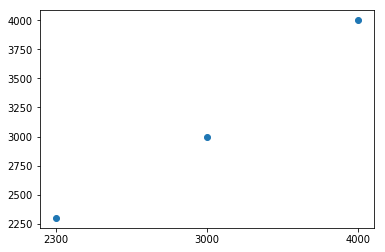

In [129]:
plt.scatter(y_test,y_pred)

In [132]:
from sklearn.neighbors import KNeighborsClassifier

In [133]:
#kn=KNeighborsClassifier()

In [134]:
#kn.fit(x_test,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [136]:
#y_pred=kn.predict(x_test)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 3, n_neighbors = 5

In [ ]:
#print(accuracy_score(y_test,y_pred))

In [ ]:
#from sklearn.ensemble import RandomForestRegressor

In [ ]:
#RF=RandomForestRegressor()

In [ ]:
#RF.fit(x_test,y_test)

In [ ]:
#y_pred=RF.predict(x_test)
#print(accuracy_score(y_test,y_pred))

In [ ]:
!pip install watson-machine-learning-client

In [130]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

wml_credentials = {
  "apikey": "H0QEnJAgtmm-KmvFrYM2qXjLWsFg-2NvjUkyY86Tcem9",
  "instance_id": "e509fec1-daef-46ae-a87e-b19f5d4f44fe",
  "password": "974aeb23-ce04-48f9-9cc0-c5a45b9624c9",
  "url": "https://eu-gb.ml.cloud.ibm.com",
  "username": "908d8282-ced5-40a3-8671-2ff7b64b33f9"
}
client = WatsonMachineLearningAPIClient(wml_credentials)
model_definition_metadata = {
            client.repository.DefinitionMetaNames.AUTHOR_NAME: "Santosh Nainala",
            client.repository.DefinitionMetaNames.AUTHOR_EMAIL: "santosh.nainala@gmail.com"
            }
saved_model_details = client.repository.store_model(DR, {"name": "Salary Predictor"})
model_uid = client.repository.get_model_uid(saved_model_details)
model_uid
'5cd845e2-ae9e-4f20-b908-78c30f636264'
deployment_details = client.deployments.create(model_uid, "Salary Predictor Deployment")



#######################################################################################

Synchronous deployment creation for uid: 'db8a79eb-903c-4910-ad1e-429710f6e865' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='8cc4ec49-45a4-4d2c-a9a2-bd41bb2d7347'
------------------------------------------------------------------------------------------------




In [131]:
scoring_endpoint = client.deployments.get_scoring_url(deployment_details)
print("scoring_endpoint = "+scoring_endpoint)

scoring_endpoint = https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/e509fec1-daef-46ae-a87e-b19f5d4f44fe/deployments/8cc4ec49-45a4-4d2c-a9a2-bd41bb2d7347/online
